In [1]:
import numpy as np
import pandas as pd
import random


import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


import seaborn as sns
import matplotlib.pyplot as plt

import os
import zipfile

DATA_PATH = "./C-NMC_Leukemia/training_data"

In [ ]:
'''
archive = zipfile.ZipFile('archive.zip', 'r')

for file in archive.namelist():
    if file.startswith('C-NMC_Leukemia/training_data/'):
        archive.extract(file, './')
'''

In [10]:
def load_data(path_to_data):
    images = []
    folds = []
    image_id = []
    labels = []

    l = os.listdir(path_to_data)

    for fold in l:
        fold_path = os.path.join(path_to_data, fold)

        for label in os.listdir(fold_path):
            label_path = os.path.join(fold_path, label)

            image_file = os.listdir(label_path)
            for image in image_file:
                image_path = os.path.join(label_path,image)
                img = load_img(image_path, color_mode="rgb")
                images.append(img)
                labels.append(label)
                folds.append(fold)
                image_id.append(image)



    return images, labels, image_id, folds




In [11]:
images, labels, image_id, folds = load_data(DATA_PATH)


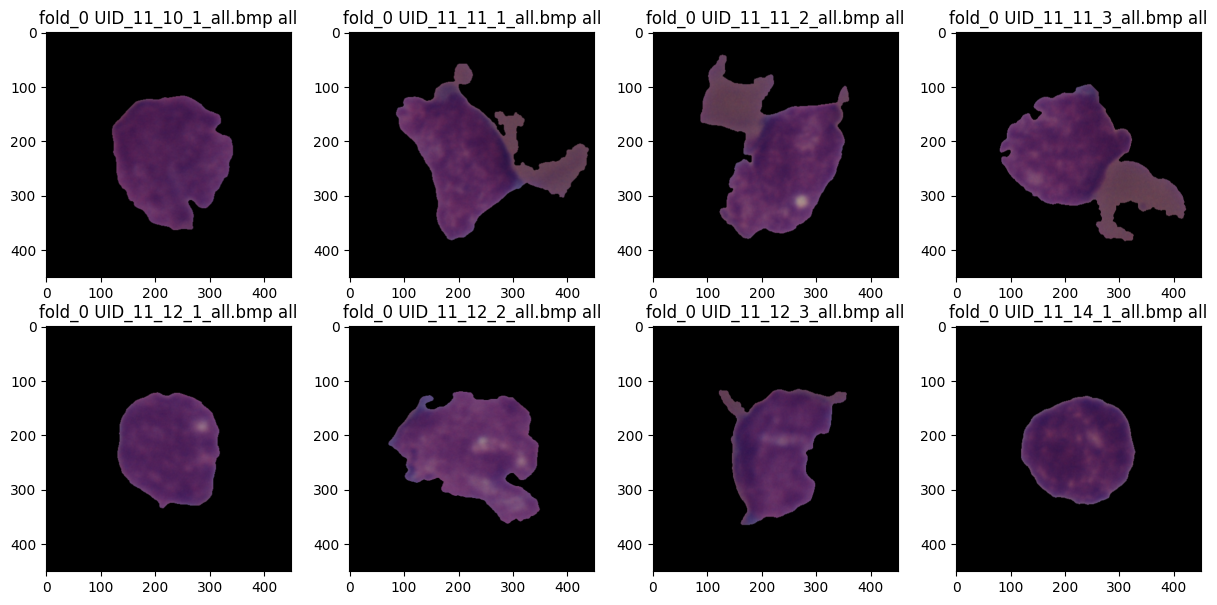

In [14]:
fig, axes = plt.subplots(2,4, figsize = (15, 7))

row= 0 
column  = 0
for index in range(8):
    ax = axes[row, column]
    ax.imshow(images[index])
    ax.set_title(folds[index] + " " + image_id[index] + " " + labels[index])
    column +=1
    if column >= 4:
        row += 1
        column = 0